http://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html#reading-multivariate-analysis-data-into-python

http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html

http://sebastianraschka.com/Articles/2014_pca_step_by_step.html

In [39]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

The wine data contains data on concentrations of 13 different chemicals in wines grown in the same region in Italy that are derived from three different cultivars, which are coded as 1, 2 and 3 in the dataset.

In [2]:
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header = None)

In [4]:
# rename column names 
data.columns = ["v" + str(i) for i in range(1, len(data.columns) + 1)]
# change to categorical variables
data.v1 = data.v1.astype(str)

In [16]:
# independent variables data
x = data.loc[:, "v2":]  
# dependent variables data
y = data.v1  
data.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
### matrix scatterplot

/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


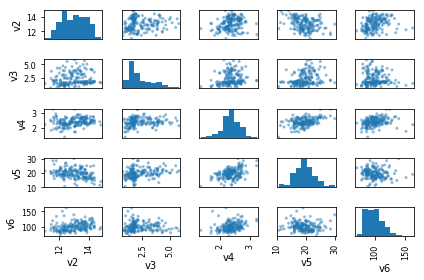

In [55]:
plt.figure(figsize = (10, 10))
pd.tools.plotting.scatter_matrix(data.loc[:, "v2":"v6"], diagonal = "hist")
plt.tight_layout()

plt.show()

In [18]:
### scatter plot with dat points labelled by their groups 

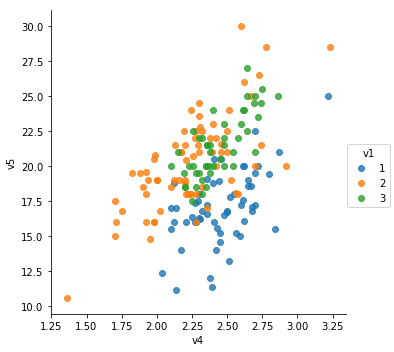

In [20]:
# as from the scatter plot above, v4 and v5 maybe correlated 

plt.figure(figsize = (10, 10))
sns.lmplot("v4", "v5", data, hue = "v1", fit_reg = False)

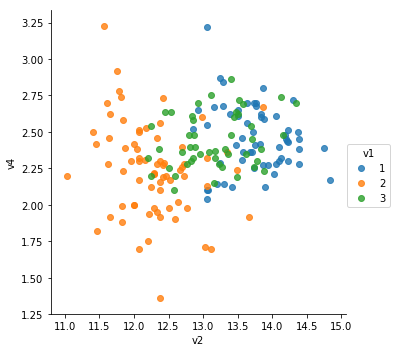

In [54]:
# as from the scatter plot above, v2 and v4 are less likely to be correlated 
plt.figure(figsize = (10, 10))

sns.lmplot("v2", "v4", data, hue = "v1", fit_reg = False)

### profile plot 
Another type of plot that is useful is a profile plot, which shows the variation in each of the variables, by plotting the value of each of the variables for each of the samples.

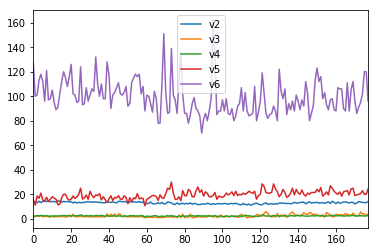

In [52]:
plt.figure(figsize = (10, 10))

fig = data.loc[:,"v2":"v6"].plot()
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
### summary statistics for multivariate data

In [31]:
x.apply(np.mean)

v2      13.000618
v3       2.336348
v4       2.366517
v5      19.494944
v6      99.741573
v7       2.295112
v8       2.029270
v9       0.361854
v10      1.590899
v11      5.058090
v12      0.957449
v13      2.611685
v14    746.893258
dtype: float64

In [33]:
x.apply(np.std)

v2       0.809543
v3       1.114004
v4       0.273572
v5       3.330170
v6      14.242308
v7       0.624091
v8       0.996049
v9       0.124103
v10      0.570749
v11      2.311765
v12      0.227929
v13      0.707993
v14    314.021657
dtype: float64

In order to compare the variables, they need to be standardised such that each variable has a sample variance of 1 and sample mean of 0.

In [34]:
### correlation for multivariate data 

In [41]:
# use scipy stats to get Pearson correlation coefficient and the p-value for testing non-correlation
corr = scipy.stats.pearsonr(x.v2, x.v3)
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 0.210081985971
cor:		 0.0943969409104


In [42]:
# or use pandas corr when there are too many variables
corrmax = x.corr()
corrmax

,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14
v2,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
v3,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
v4,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
v5,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
v6,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
v7,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
v8,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
v9,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
v10,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
v11,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


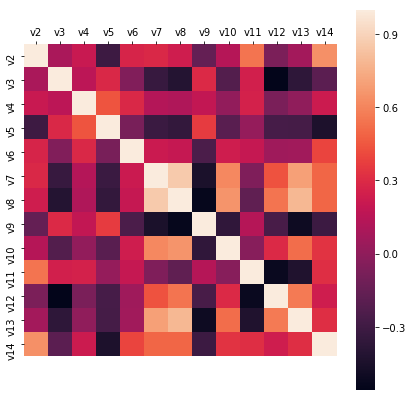

In [48]:
# heatmap 

plt.figure(figsize = (7, 7))
sns.heatmap(corrmax, vmax = 1., square = True ).xaxis.tick_top()

plt.show()

In [ ]:
### standadizing variables 


In [59]:
# standerdize the original data variables and create a new df to store the standerdized variables

from sklearn.preprocessing import scale 

stdx = scale(x)
stdx = pd.DataFrame(stdx, index = x.index, columns = x.columns)